**Considerations:**
    - Drop TBG_measured and TBG columns 
    - Drop 

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import BayesianRidge

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [107]:
headers = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_med', 'sick', 'pregnant', 'thyroid surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid','lithium','goitre','tumor',
          'hypopituitary','psych','TSH_measured', 'TSH','T3_measured','T3', 'TT4_measured', 'TT4', 'T4U measured','T4U',
          'FTI measured', 'FTI','TBG_measured','TBG', 'referral_source', 'class' ]

In [108]:
hypo = pd.read_csv('../data/allhypo.data',names = headers)

In [109]:
hypo

age sex on_thyroxine query_on_thyroxine on_antithyroid_med sick pregnant  \
0     41   F            f                  f                  f    f        f   
1     23   F            f                  f                  f    f        f   
2     46   M            f                  f                  f    f        f   
3     70   F            t                  f                  f    f        f   
4     70   F            f                  f                  f    f        f   
...   ..  ..          ...                ...                ...  ...      ...   
2795  70   M            f                  f                  f    f        f   
2796  73   M            f                  t                  f    f        f   
2797  75   M            f                  f                  f    f        f   
2798  60   F            f                  f                  f    f        f   
2799  81   F            f                  f                  f    f        f   

     thyroid surgery I131_treatment query_hypothyroid  ... TT4_measured  TT4  \
0                  f              f                 f  ...            t  125   
1                  f              f                 f  ...            t  102   
2                  f              f                 f  ...            t  109   
3                  f              f                 f  ...            t  175   
4                  f              f                 f  ...            t   61   
...              ...            ...               ...  ...          ...  ...   
2795               f              f                 f  ...            t  155   
2796               f              f                 f  ...            t   63   
2797               f              f                 f  ...            t  147   
2798               f              f                 f  ...            t  100   
2799               f              f                 f  ...            t  114   

     T4U measured   T4U FTI measured  FTI TBG_measured TBG referral_source  \
0               t  1.14            t  109            f   ?            SVHC   
1               f     ?            f    ?            f   ?           other   
2               t  0.91            t  120            f   ?           other   
3               f     ?            f    ?            f   ?           other   
4               t  0.87            t   70            f   ?             SVI   
...           ...   ...          ...  ...          ...  ..             ...   
2795            t  1.05            t  148            f   ?             SVI   
2796            t  0.88            t   72            f   ?           other   
2797            t   0.8            t  183            f   ?           other   
2798            t  0.83            t  121            f   ?           other   
2799            t  0.99            t  115            f   ?             SVI   

               class  
0     negative.|3733  
1     negative.|1442  
2     negative.|2965  
3      negative.|806  
4     negative.|2807  
...              ...  
2795  negative.|3689  
2796  negative.|3652  
2797  negative.|1287  
2798  negative.|3496  
2799   negative.|724  

[2800 rows x 30 columns]

In [110]:
hypo['class'] = hypo['class'].apply(lambda row: row.split(".")[0])


In [111]:
hypo['class'].value_counts()

negative                   2580
compensated hypothyroid     154
primary hypothyroid          64
secondary hypothyroid         2
Name: class, dtype: int64

### Combine ncompensated, primary and secondary hypothyroid together 
* Note: For primary hypothyroidism, the TSH level is high while the TSH level for secondary hypothyroidism is low. 
* Index:
    - 1: hypothyroid
    - 2: hyperthyroid 
    - 3: Euthyroid 

In [112]:
hypo['class'] = hypo['class'].apply(lambda row: 1 if row != "negative" else 0)

In [113]:
hypo

age sex on_thyroxine query_on_thyroxine on_antithyroid_med sick pregnant  \
0     41   F            f                  f                  f    f        f   
1     23   F            f                  f                  f    f        f   
2     46   M            f                  f                  f    f        f   
3     70   F            t                  f                  f    f        f   
4     70   F            f                  f                  f    f        f   
...   ..  ..          ...                ...                ...  ...      ...   
2795  70   M            f                  f                  f    f        f   
2796  73   M            f                  t                  f    f        f   
2797  75   M            f                  f                  f    f        f   
2798  60   F            f                  f                  f    f        f   
2799  81   F            f                  f                  f    f        f   

     thyroid surgery I131_treatment query_hypothyroid  ... TT4_measured  TT4  \
0                  f              f                 f  ...            t  125   
1                  f              f                 f  ...            t  102   
2                  f              f                 f  ...            t  109   
3                  f              f                 f  ...            t  175   
4                  f              f                 f  ...            t   61   
...              ...            ...               ...  ...          ...  ...   
2795               f              f                 f  ...            t  155   
2796               f              f                 f  ...            t   63   
2797               f              f                 f  ...            t  147   
2798               f              f                 f  ...            t  100   
2799               f              f                 f  ...            t  114   

     T4U measured   T4U FTI measured  FTI TBG_measured TBG referral_source  \
0               t  1.14            t  109            f   ?            SVHC   
1               f     ?            f    ?            f   ?           other   
2               t  0.91            t  120            f   ?           other   
3               f     ?            f    ?            f   ?           other   
4               t  0.87            t   70            f   ?             SVI   
...           ...   ...          ...  ...          ...  ..             ...   
2795            t  1.05            t  148            f   ?             SVI   
2796            t  0.88            t   72            f   ?           other   
2797            t   0.8            t  183            f   ?           other   
2798            t  0.83            t  121            f   ?           other   
2799            t  0.99            t  115            f   ?             SVI   

     class  
0        0  
1        0  
2        0  
3        0  
4        0  
...    ...  
2795     0  
2796     0  
2797     0  
2798     0  
2799     0  

[2800 rows x 30 columns]

In [114]:
hypo['class'].value_counts()

0    2580
1     220
Name: class, dtype: int64

### Convert categorical values into numbers 

In [115]:
# replace '?' with nan values 
hypo1 = hypo.replace('?', np.nan).copy()

In [116]:
def convert_category(dataframe, column):
    
    if column == 'Sex':
        conditionF = dataframe[column] == 'F' # For sex column
        conditionT = dataframe[column] == 'M' # For sex column
    else:
        conditionF = dataframe[column] == 'f'
        conditionT = dataframe[column] == 't'
    
    dataframe.loc[conditionF, column] = 0
    dataframe.loc[conditionT, column] = 1

In [117]:
# Binarize Category Columns
bin_cols = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_med', 'sick', 'pregnant', 'thyroid surgery', 
            'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid','lithium','goitre','tumor',
          'hypopituitary','psych','TSH_measured','T3_measured', 'TT4_measured', 'T4U measured',
          'FTI measured','TBG_measured']
'''bin_cols = ['On Thyroxine', 'Query on Thyroxine', 'Sex',
               'On Antithyroid Medication', 'Sick', 'Pregnant', 
               'Thyroid Surgery', 'I131 Treatment', 'Query Hypothyroid', 
               'Query Hyperthyroid', 'Lithium', 'Goitre', 'Tumor', 
               'Hypopituitary', 'Psych', 'TSH Measured', 'T3 Measured', 
               'TT4 Measured', 'T4U Measured', 'FTI Measured']
'''
for col in bin_cols: 
    convert_category(hypo1, col)
    

In [118]:
hypo1.head()

age sex on_thyroxine query_on_thyroxine on_antithyroid_med sick pregnant  \
0  41   F            0                  0                  0    0        0   
1  23   F            0                  0                  0    0        0   
2  46   M            0                  0                  0    0        0   
3  70   F            1                  0                  0    0        0   
4  70   F            0                  0                  0    0        0   

  thyroid surgery I131_treatment query_hypothyroid  ... TT4_measured  TT4  \
0               0              0                 0  ...            1  125   
1               0              0                 0  ...            1  102   
2               0              0                 0  ...            1  109   
3               0              0                 0  ...            1  175   
4               0              0                 0  ...            1   61   

  T4U measured   T4U FTI measured  FTI TBG_measured TBG referral_source class  
0            1  1.14            1  109            0 NaN            SVHC     0  
1            0   NaN            0  NaN            0 NaN           other     0  
2            1  0.91            1  120            0 NaN           other     0  
3            0   NaN            0  NaN            0 NaN           other     0  
4            1  0.87            1   70            0 NaN             SVI     0  

[5 rows x 30 columns]

In [119]:
hypo1.TSH[0] # not numerical values

'1.3'

In [120]:
# Numerical da
for col in hypo1.columns: 
    if col != 'class' and col != 'sex':
        hypo1[col] = pd.to_numeric(hypo1[col],errors='coerce')

In [121]:
hypo1.TSH[0]

1.3

In [122]:
hypo1.to_csv('../data/hypo_wna.csv')

In [123]:
print(pd.__version__)

1.1.3


In [124]:
hypo1['sex'].value_counts()

F    1830
M     860
Name: sex, dtype: int64

In [125]:
# drop rows with missing gender
hypo1 = hypo1[hypo1['sex'].notna()]

### Impute missing values 

* Since there are more than 5% of missing data, I choose to perform imputation on these features: sex, TSH, T3, TT4, T4U, FTI
* Why Iterative Imputation?
    - 20.0.

In [126]:
hypo1.isnull().sum()

age                      1
sex                      0
on_thyroxine             0
query_on_thyroxine       0
on_antithyroid_med       0
sick                     0
pregnant                 0
thyroid surgery          0
I131_treatment           0
query_hypothyroid        0
query_hyperthyroid       0
lithium                  0
goitre                   0
tumor                    0
hypopituitary            0
psych                    0
TSH_measured             0
TSH                    271
T3_measured              0
T3                     570
TT4_measured             0
TT4                    172
T4U measured             0
T4U                    280
FTI measured             0
FTI                    278
TBG_measured             0
TBG                   2690
referral_source       2690
class                    0
dtype: int64

In [127]:
print("Presence of null values: " + str(hypo1.isnull().values.any()))

Presence of null values: True


In [128]:
hypo1['TSH'] = pd.to_numeric(hypo1['TSH'],errors='coerce')

In [129]:
hypo1['TSH'][0]

1.3

In [130]:
hypo1['sex'] = hypo1['sex'].replace({'M':0, 'F':1})

### Inspect  the histograms to decide on how I want to replace the null values 

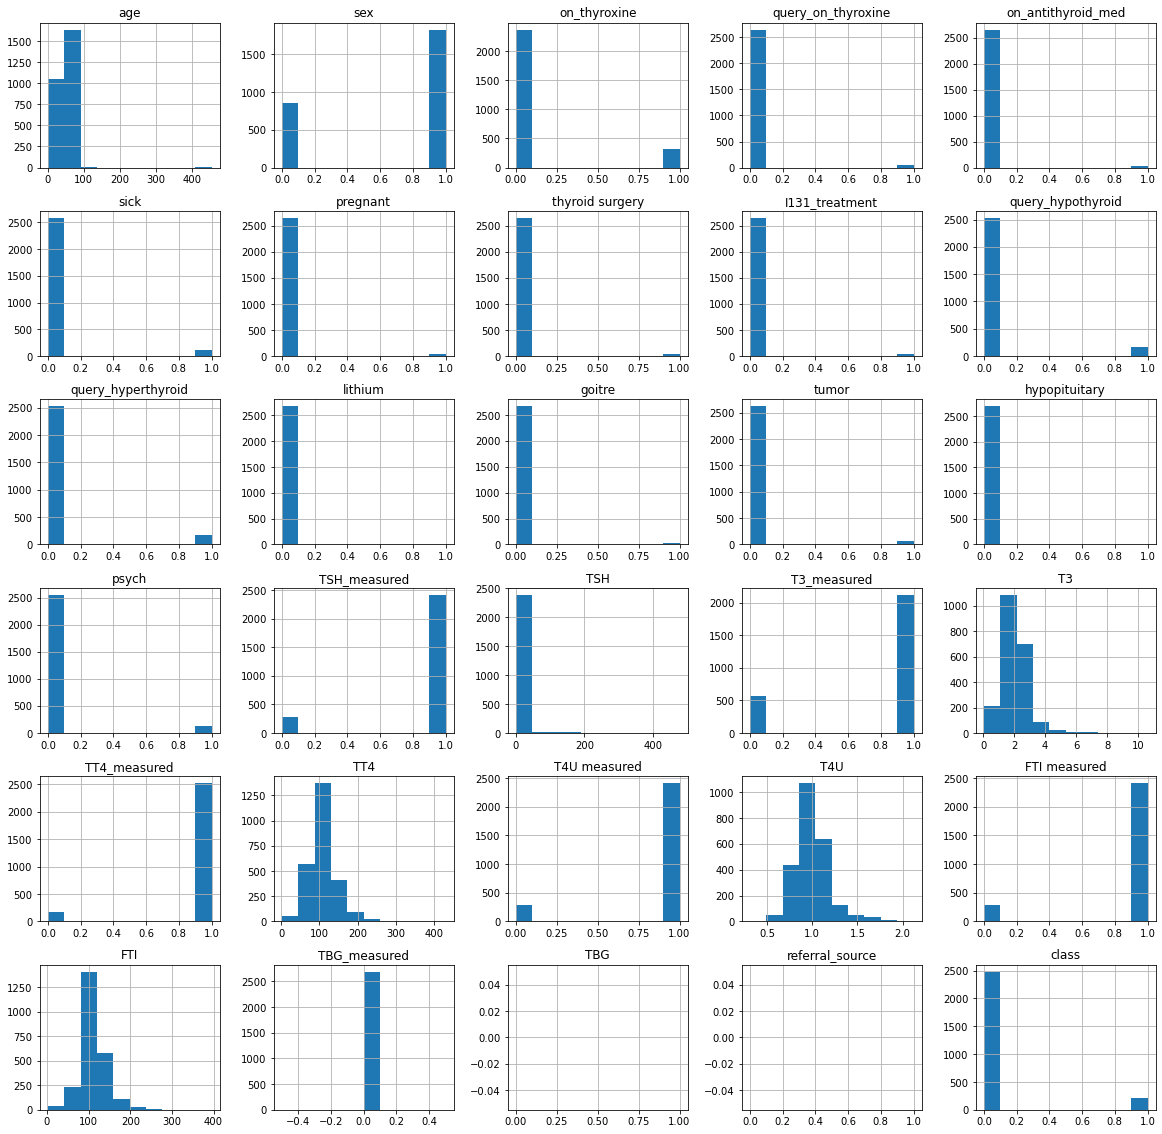

In [131]:
p = hypo1.hist(figsize = (20,20))

<AxesSubplot:>

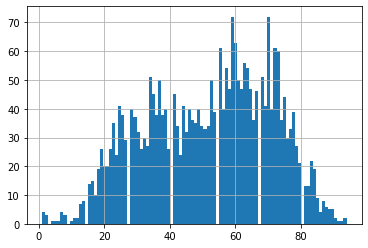

In [140]:
hypo1['age'].hist(bins = 100)

* Hm what is that ~400 doing over there? 

In [141]:
hypo1.loc[hypo1['age'] == 455.0, 'age'] = 45.0 #outlier: 1364    455.0

In [142]:
hypo1.loc[hypo1['age'] > 500.0]

Empty DataFrame
Columns: [age, sex, on_thyroxine, query_on_thyroxine, on_antithyroid_med, sick, pregnant, thyroid surgery, I131_treatment, query_hypothyroid, query_hyperthyroid, lithium, goitre, tumor, hypopituitary, psych, TSH_measured, TSH, T3_measured, T3, TT4_measured, TT4, T4U measured, T4U, FTI measured, FTI, TBG_measured, TBG, referral_source, class]
Index: []

[0 rows x 30 columns]

In [143]:
hypo1.iloc[1364]

age                   63.0
sex                    0.0
on_thyroxine           0.0
query_on_thyroxine     0.0
on_antithyroid_med     0.0
sick                   0.0
pregnant               0.0
thyroid surgery        0.0
I131_treatment         0.0
query_hypothyroid      0.0
query_hyperthyroid     0.0
lithium                0.0
goitre                 0.0
tumor                  0.0
hypopituitary          0.0
psych                  0.0
TSH_measured           1.0
TSH                    2.6
T3_measured            0.0
T3                     NaN
TT4_measured           1.0
TT4                   84.0
T4U measured           1.0
T4U                    0.9
FTI measured           1.0
FTI                   93.0
TBG_measured           0.0
TBG                    NaN
referral_source        NaN
class                  0.0
Name: 1418, dtype: float64

In [144]:
hypo1.dtypes

age                   float64
sex                     int64
on_thyroxine            int64
query_on_thyroxine      int64
on_antithyroid_med      int64
sick                    int64
pregnant                int64
thyroid surgery         int64
I131_treatment          int64
query_hypothyroid       int64
query_hyperthyroid      int64
lithium                 int64
goitre                  int64
tumor                   int64
hypopituitary           int64
psych                   int64
TSH_measured            int64
TSH                   float64
T3_measured             int64
T3                    float64
TT4_measured            int64
TT4                   float64
T4U measured            int64
T4U                   float64
FTI measured            int64
FTI                   float64
TBG_measured            int64
TBG                   float64
referral_source       float64
class                   int64
dtype: object

* Why Iterative Imputation? 
    - Each feature is modeled as a function of the other features. Each missing feature is imputed sequentially, allowing prior imputed values to be used as part of a model in predicting subsequent features 
    - The iteration helps improve the estimates of missing values by repeating the process multiple times

In [145]:
# Multivariate imputer 
X = hypo1.columns.difference(['class'])
imp = IterativeImputer(max_iter=10,random_state=0)
imputed_data = imp.fit_transform(hypo1.drop('class', axis =1))

In [146]:
len(imputed_data[-1])

27

In [147]:
imputed_data[-1]

array([ 81.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         1.  ,   1.2 ,   1.  ,   1.5 ,   1.  , 114.  ,   1.  ,   0.99,
         1.  , 115.  ,   0.  ])

In [148]:
hypo1.iloc[-1]

age                    81.00
sex                     1.00
on_thyroxine            0.00
query_on_thyroxine      0.00
on_antithyroid_med      0.00
sick                    0.00
pregnant                0.00
thyroid surgery         0.00
I131_treatment          0.00
query_hypothyroid       0.00
query_hyperthyroid      0.00
lithium                 0.00
goitre                  0.00
tumor                   0.00
hypopituitary           0.00
psych                   0.00
TSH_measured            1.00
TSH                     1.20
T3_measured             1.00
T3                      1.50
TT4_measured            1.00
TT4                   114.00
T4U measured            1.00
T4U                     0.99
FTI measured            1.00
FTI                   115.00
TBG_measured            0.00
TBG                      NaN
referral_source          NaN
class                   0.00
Name: 2799, dtype: float64

In [149]:
cols = hypo1.columns.drop(['TBG','referral_source', 'class'])
cols

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_med', 'sick', 'pregnant', 'thyroid surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG_measured'],
      dtype='object')

In [150]:
len(imputed_data[0])

27

In [151]:
imputed_data_df = pd.DataFrame(imputed_data, columns = cols)

In [152]:
imputed_data_df.head(5)

age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_med  sick  \
0  41.0  1.0           0.0                 0.0                 0.0   0.0   
1  23.0  1.0           0.0                 0.0                 0.0   0.0   
2  46.0  0.0           0.0                 0.0                 0.0   0.0   
3  70.0  1.0           1.0                 0.0                 0.0   0.0   
4  70.0  1.0           0.0                 0.0                 0.0   0.0   

   pregnant  thyroid surgery  I131_treatment  query_hypothyroid  ...   TSH  \
0       0.0              0.0             0.0                0.0  ...  1.30   
1       0.0              0.0             0.0                0.0  ...  4.10   
2       0.0              0.0             0.0                0.0  ...  0.98   
3       0.0              0.0             0.0                0.0  ...  0.16   
4       0.0              0.0             0.0                0.0  ...  0.72   

   T3_measured        T3  TT4_measured    TT4  T4U measured       T4U  \
0          1.0  2.500000           1.0  125.0           1.0  1.140000   
1          1.0  2.000000           1.0  102.0           0.0  0.709793   
2          0.0  2.075232           1.0  109.0           1.0  0.910000   
3          1.0  1.900000           1.0  175.0           0.0  0.738666   
4          1.0  1.200000           1.0   61.0           1.0  0.870000   

   FTI measured         FTI  TBG_measured  
0           1.0  109.000000           0.0  
1           0.0  138.940552           0.0  
2           1.0  120.000000           0.0  
3           0.0  207.313322           0.0  
4           1.0   70.000000           0.0  

[5 rows x 27 columns]

In [153]:
hypo_data = pd.concat([imputed_data_df.reset_index(), hypo1['class'].reset_index()], axis =1)

In [154]:
hypo_data = hypo_data.drop('index', axis = 1)
type(hypo_data)

pandas.core.frame.DataFrame

In [155]:
# double check for null values
# hypo_data.dtypes 

In [156]:
hypo1[blood_test]

TSH   T3    TT4   T4U    FTI  class
0     1.30  2.5  125.0  1.14  109.0      0
1     4.10  2.0  102.0   NaN    NaN      0
2     0.98  NaN  109.0  0.91  120.0      0
3     0.16  1.9  175.0   NaN    NaN      0
4     0.72  1.2   61.0  0.87   70.0      0
...    ...  ...    ...   ...    ...    ...
2795  2.70  NaN  155.0  1.05  148.0      0
2796   NaN  0.7   63.0  0.88   72.0      0
2797   NaN  NaN  147.0  0.80  183.0      0
2798  1.40  NaN  100.0  0.83  121.0      0
2799  1.20  1.5  114.0  0.99  115.0      0

[2690 rows x 6 columns]

In [157]:
hypo_data[blood_test]

TSH        T3    TT4       T4U         FTI  class
0     1.300000  2.500000  125.0  1.140000  109.000000      0
1     4.100000  2.000000  102.0  0.709793  138.940552      0
2     0.980000  2.075232  109.0  0.910000  120.000000      0
3     0.160000  1.900000  175.0  0.738666  207.313322      0
4     0.720000  1.200000   61.0  0.870000   70.000000      0
...        ...       ...    ...       ...         ...    ...
2685  2.700000  2.435297  155.0  1.050000  148.000000      0
2686  7.492758  0.700000   63.0  0.880000   72.000000      0
2687 -6.532736  2.808988  147.0  0.800000  183.000000      0
2688  1.400000  1.700958  100.0  0.830000  121.000000      0
2689  1.200000  1.500000  114.0  0.990000  115.000000      0

[2690 rows x 6 columns]

In [158]:
blood_test = ['TSH', 'T3','TT4', 'T4U', 'FTI', 'class']
origin = hypo1[blood_test].reset_index()
impute = hypo_data[blood_test].reset_index()
compare =pd.concat([origin,impute], axis =1, keys=['First', 'Second'] )
compare

First                                      Second                      \
     index   TSH   T3    TT4   T4U    FTI class  index       TSH        T3   
0        0  1.30  2.5  125.0  1.14  109.0     0      0  1.300000  2.500000   
1        1  4.10  2.0  102.0   NaN    NaN     0      1  4.100000  2.000000   
2        2  0.98  NaN  109.0  0.91  120.0     0      2  0.980000  2.075232   
3        3  0.16  1.9  175.0   NaN    NaN     0      3  0.160000  1.900000   
4        4  0.72  1.2   61.0  0.87   70.0     0      4  0.720000  1.200000   
...    ...   ...  ...    ...   ...    ...   ...    ...       ...       ...   
2685  2795  2.70  NaN  155.0  1.05  148.0     0   2685  2.700000  2.435297   
2686  2796   NaN  0.7   63.0  0.88   72.0     0   2686  7.492758  0.700000   
2687  2797   NaN  NaN  147.0  0.80  183.0     0   2687 -6.532736  2.808988   
2688  2798  1.40  NaN  100.0  0.83  121.0     0   2688  1.400000  1.700958   
2689  2799  1.20  1.5  114.0  0.99  115.0     0   2689  1.200000  1.500000   

                                         
        TT4       T4U         FTI class  
0     125.0  1.140000  109.000000     0  
1     102.0  0.709793  138.940552     0  
2     109.0  0.910000  120.000000     0  
3     175.0  0.738666  207.313322     0  
4      61.0  0.870000   70.000000     0  
...     ...       ...         ...   ...  
2685  155.0  1.050000  148.000000     0  
2686   63.0  0.880000   72.000000     0  
2687  147.0  0.800000  183.000000     0  
2688  100.0  0.830000  121.000000     0  
2689  114.0  0.990000  115.000000     0  

[2690 rows x 14 columns]

In [159]:
compare2 = compare.swaplevel(axis='columns')[origin.columns[1:]]
compare2

TSH              T3              TT4          T4U              FTI  \
     First    Second First    Second  First Second First    Second  First   
0     1.30  1.300000   2.5  2.500000  125.0  125.0  1.14  1.140000  109.0   
1     4.10  4.100000   2.0  2.000000  102.0  102.0   NaN  0.709793    NaN   
2     0.98  0.980000   NaN  2.075232  109.0  109.0  0.91  0.910000  120.0   
3     0.16  0.160000   1.9  1.900000  175.0  175.0   NaN  0.738666    NaN   
4     0.72  0.720000   1.2  1.200000   61.0   61.0  0.87  0.870000   70.0   
...    ...       ...   ...       ...    ...    ...   ...       ...    ...   
2685  2.70  2.700000   NaN  2.435297  155.0  155.0  1.05  1.050000  148.0   
2686   NaN  7.492758   0.7  0.700000   63.0   63.0  0.88  0.880000   72.0   
2687   NaN -6.532736   NaN  2.808988  147.0  147.0  0.80  0.800000  183.0   
2688  1.40  1.400000   NaN  1.700958  100.0  100.0  0.83  0.830000  121.0   
2689  1.20  1.200000   1.5  1.500000  114.0  114.0  0.99  0.990000  115.0   

                 class         
          Second First Second  
0     109.000000     0      0  
1     138.940552     0      0  
2     120.000000     0      0  
3     207.313322     0      0  
4      70.000000     0      0  
...          ...   ...    ...  
2685  148.000000     0      0  
2686   72.000000     0      0  
2687  183.000000     0      0  
2688  121.000000     0      0  
2689  115.000000     0      0  

[2690 rows x 12 columns]

In [160]:
def highlight_diff(data, color='yellow'):
    attr = 'background-color: {}'.format(color)
    other = data.xs('First', axis='columns', level=-1)
    return pd.DataFrame(np.where(data.ne(other, level=0), attr, ''),
                        index=data.index, columns=data.columns)

compare2.style.apply(highlight_diff, axis=None)

In [161]:
hypo1.iloc[23]

age                    55.00
sex                     0.00
on_thyroxine            0.00
query_on_thyroxine      0.00
on_antithyroid_med      0.00
sick                    0.00
pregnant                0.00
thyroid surgery         0.00
I131_treatment          0.00
query_hypothyroid       0.00
query_hyperthyroid      0.00
lithium                 0.00
goitre                  0.00
tumor                   0.00
hypopituitary           0.00
psych                   0.00
TSH_measured            1.00
TSH                     0.20
T3_measured             1.00
T3                      1.80
TT4_measured            1.00
TT4                   134.00
T4U measured            1.00
T4U                     1.02
FTI measured            1.00
FTI                   131.00
TBG_measured            0.00
TBG                      NaN
referral_source          NaN
class                   0.00
Name: 24, dtype: float64

In [162]:
hypo_data.iloc[23]

age                    55.00
sex                     0.00
on_thyroxine            0.00
query_on_thyroxine      0.00
on_antithyroid_med      0.00
sick                    0.00
pregnant                0.00
thyroid surgery         0.00
I131_treatment          0.00
query_hypothyroid       0.00
query_hyperthyroid      0.00
lithium                 0.00
goitre                  0.00
tumor                   0.00
hypopituitary           0.00
psych                   0.00
TSH_measured            1.00
TSH                     0.20
T3_measured             1.00
T3                      1.80
TT4_measured            1.00
TT4                   134.00
T4U measured            1.00
T4U                     1.02
FTI measured            1.00
FTI                   131.00
TBG_measured            0.00
class                   0.00
Name: 23, dtype: float64

In [163]:
hypo_data.to_csv('../data/imputed_hypo.csv')

### Missing feature imputation with different models

* BayesianRidge: regularized linear regression 
* DecisionTreeRegressor: non-linear regression 
* ExtraTreesRegressor: similar to missForest
* KNeighborsRegressor: comparable to other KNN imputation approaches 

In [6]:
hypo1 = pd.read_csv('../data/hypo_wna.csv')
hypo1 = hypo1.drop(columns = 'Unnamed: 0')

In [8]:
br_estimator = BayesianRidge()

estimators = [BayesianRidge(),
            DecisionTreeRegressor(max_features='sqrt', random_state=0),
            ExtraTreesRegressor(n_estimators=10, random_state=0),
            KNeighborsRegressor(n_neighbors=15)]

score_iterative_imputer = pd.DataFrame()

for impute_estimator in estimators:
    estimator = make_pipeline(
        IterativeImputer(random_state=0, estimator=impute_estimator),
        br_estimator
    )
    score_iterative_imputer[impute_estimator.__class__.__name__] = \
        cross_val_score(
            estimator, hypo1.columns.difference(['class']),hypo1.class, scoring='neg_mean_squared_error',
            cv=5
        )
    
# test multivariate feature imputation 
#X = hypo1.columns.difference(['class'])
#imp = IterativeImputer(max_iter=10,random_state=0)
#imputed_data = imp.fit_transform(hypo1.drop('class', axis =1))
#imuted_data = pd.DataFrame(imputed_data, columns = X)    

SyntaxError: invalid syntax (<ipython-input-8-455bf56361ad>, line 17)

In [23]:
# for continuous column - TSH
# import datawig
from sklearn.impute import SimpleImputer
df_train, df_test = datawig.utils.random_split(hypo1)

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_med', 'sick', 'pregnant', 'thyroid surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid','lithium','goitre','tumor',
          'hypopituitary','psych','T3_measured','T3', 'TT4_measured', 'TT4', 'T4U measured','T4U',
          'FTI measured', 'FTI', 'class'], # column(s) containing information about the column we want to impute
    output_column= 'TSH', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )



NameError: name 'datawig' is not defined

In [24]:
#Fit an imputer model on the train data
imputer.fit(train_df=df_train, num_epochs=50)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test)

# Calculate f1 score for true vs predicted values
f1 = f1_score(predictions['finish'], predictions['finish_imputed'], average='weighted')

# Print overall classification report
print(classification_report(predictions['finish'], predictions['finish_imputed']))


NameError: name 'imputer' is not defined

In [123]:
hypo1['TSH']

0        1.3
1        4.1
2       0.98
3       0.16
4       0.72
        ... 
2795     2.7
2796     NaN
2797     NaN
2798     1.4
2799     1.2
Name: TSH, Length: 2800, dtype: object